# Mobile Price Classification

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

[Данные](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)


In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Инициализация API
api = KaggleApi()
api.authenticate()

# Путь для сохранения набора данных
dataset_path = 'Data/Mobile_Price_Classification/'

if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

# Скачивание и распаковка набора данных
api.dataset_download_files('iabhishekofficial/mobile-price-classification', path=dataset_path, unzip=True)

In [15]:
df = pd.read_csv('Data/Mobile_Price_Classification/train.csv')
df.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1945,1007,1,2.9,1,5,1,21,0.8,185,8,...,479,831,1301,8,6,12,1,1,0,0
912,626,0,0.7,1,2,1,23,0.5,187,2,...,90,1334,3458,7,5,11,1,0,1,2
1069,1414,0,2.6,0,1,0,27,0.6,137,4,...,804,1564,312,5,2,8,0,0,1,0
517,1059,0,2.4,0,8,0,61,0.1,134,3,...,1613,1916,3716,15,13,11,1,1,0,3
1135,1344,0,1.5,0,1,0,14,0.5,190,1,...,419,556,2074,8,1,5,1,1,0,1


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
for column in df.columns:
    if column != 'price_range':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].mask(((df[column] < lower_bound) | (df[column] > upper_bound)), np.nan)

df.fillna(df.median(), inplace=True)

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.177000,32.046500,0.501750,140.249000,4.520500,643.717500,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.0,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.150094,18.145715,0.288416,35.399655,2.287837,441.849137,432.199447,1084.732044,4.213245,4.356398,5.463955,0.0,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,1.0,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,16.000000,0.200000,109.000000,3.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.0,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,32.000000,0.500000,141.000000,4.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.0,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,48.000000,0.800000,170.000000,7.000000,945.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.0,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,16.000000,64.000000,1.000000,200.000000,8.000000,1920.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.0,1.000000,1.000000,3.000000


In [25]:
df.duplicated().sum()

0

In [16]:
from pycaret.classification import *
s = setup(df, target = 'price_range', session_id = 23)

,Description,Value
0,Session id,23
1,Target,price_range
2,Target type,Multiclass
3,Original data shape,"(2000, 21)"
4,Transformed data shape,"(2000, 21)"
5,Transformed train set shape,"(1400, 21)"
6,Transformed test set shape,"(600, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [17]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9500,0.9955,0.9500,0.9516,0.9502,0.9333,0.9337,0.0150
catboost,CatBoost Classifier,0.9329,0.9935,0.9329,0.9344,0.9328,0.9105,0.9110,4.6400
knn,K Neighbors Classifier,0.9200,0.9884,0.9200,0.9217,0.9198,0.8933,0.8940,0.0450
qda,Quadratic Discriminant Analysis,0.9129,0.9910,0.9129,0.9150,0.9122,0.8838,0.8849,0.0160
lightgbm,Light Gradient Boosting Machine,0.9057,0.9868,0.9057,0.9075,0.9054,0.8743,0.8751,0.5310
xgboost,Extreme Gradient Boosting,0.9014,0.9876,0.9014,0.9033,0.9011,0.8686,0.8694,0.1270
gbc,Gradient Boosting Classifier,0.8914,0.9834,0.8914,0.8936,0.8913,0.8552,0.8561,0.6260
rf,Random Forest Classifier,0.8736,0.9777,0.8736,0.8762,0.8730,0.8314,0.8326,0.1480
et,Extra Trees Classifier,0.8614,0.9666,0.8614,0.8626,0.8601,0.8152,0.8164,0.1140
dt,Decision Tree Classifier,0.8171,0.8781,0.8171,0.8204,0.8171,0.7562,0.7573,0.0180


In [18]:
best

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [19]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9300,0.9947,0.9300,0.9325,0.9307,0.9067,0.9070


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,prediction_label,prediction_score
1013,1694,0,1.8,0,0,0,53,1.0,186,6,...,1653,7,5,6,1,0,0,2,1,0.5353
528,1671,0,0.6,1,7,1,61,0.1,129,2,...,2336,10,4,7,1,0,0,2,2,0.9250
1830,958,1,1.6,0,9,1,60,0.4,200,1,...,1417,10,4,19,1,0,1,0,1,0.5845
427,1755,1,1.3,0,0,1,24,0.1,134,7,...,3937,8,1,7,1,0,1,3,3,0.9999
1468,1425,1,0.6,0,0,1,33,0.5,89,3,...,3771,10,3,9,1,0,1,3,3,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,1836,0,1.1,1,0,0,14,0.7,104,5,...,2469,18,6,7,1,1,1,2,2,0.9727
1849,1786,0,1.2,0,11,0,61,0.1,123,3,...,3033,14,11,17,0,1,0,3,3,0.6933
1304,1077,1,1.7,1,1,0,58,0.8,86,7,...,3902,9,3,3,1,0,0,3,3,0.9998
1112,586,0,0.5,1,1,0,57,0.3,188,2,...,3646,15,4,11,1,1,1,3,3,0.9823


In [21]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9357,0.9951,0.9357,0.9361,0.9358,0.9143,0.9143
1,0.9429,0.9985,0.9429,0.9456,0.9431,0.9238,0.9246
2,0.9643,0.9975,0.9643,0.9655,0.9643,0.9524,0.9528
3,0.9643,0.9964,0.9643,0.9674,0.9644,0.9524,0.9534
4,0.9357,0.9956,0.9357,0.9378,0.9363,0.9143,0.9146
5,0.9000,0.9858,0.9000,0.9042,0.8994,0.8667,0.8683
6,0.9214,0.9883,0.9214,0.9211,0.9210,0.8952,0.8954
7,0.9071,0.9875,0.9071,0.9078,0.9068,0.8762,0.8766
8,0.9143,0.9948,0.9143,0.9148,0.9143,0.8857,0.8859


In [23]:
evaluate_model(cb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

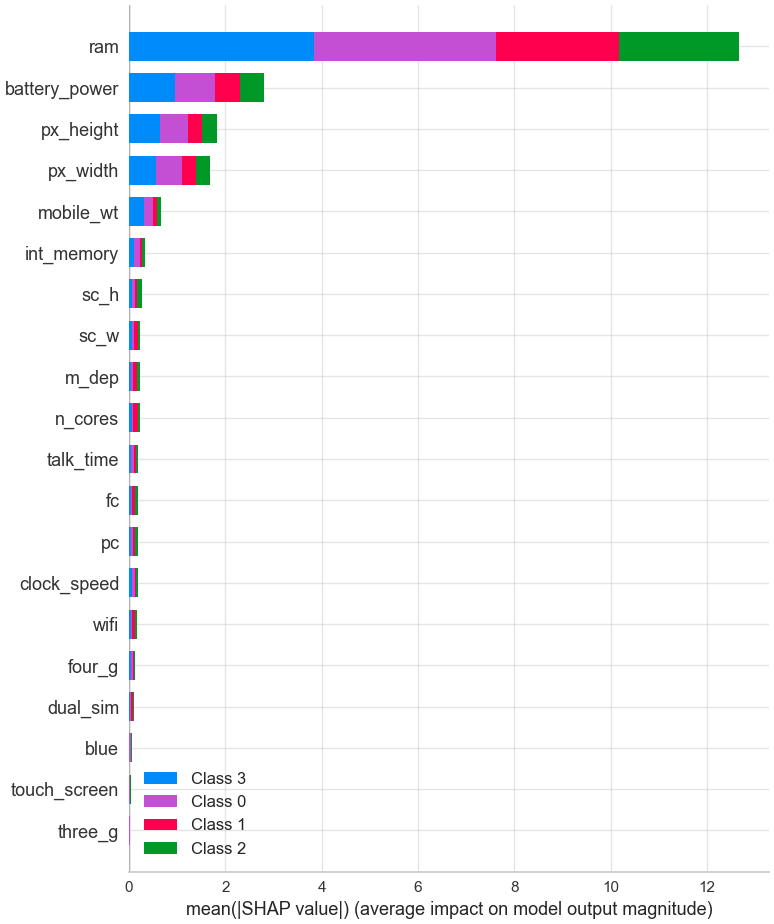

In [24]:
interpret_model(cb)

In [43]:
lda = best
qda = create_model("qda")
xg = create_model("xgboost")
lgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8500,0.9693,0.8500,0.8503,0.8469,0.8000,0.8020
1,0.9071,0.9924,0.9071,0.9128,0.9061,0.8762,0.8785
2,0.8714,0.9835,0.8714,0.8726,0.8694,0.8286,0.8302
3,0.9286,0.9910,0.9286,0.9302,0.9285,0.9048,0.9054
4,0.8500,0.9755,0.8500,0.8594,0.8527,0.8000,0.8013
5,0.8571,0.9733,0.8571,0.8593,0.8559,0.8095,0.8108
6,0.8714,0.9695,0.8714,0.8704,0.8708,0.8286,0.8286
7,0.8429,0.9683,0.8429,0.8484,0.8436,0.7905,0.7917
8,0.8857,0.9822,0.8857,0.8860,0.8852,0.8476,0.8480


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9214,0.9936,0.9214,0.9236,0.9217,0.8952,0.8958
1,0.9214,0.9933,0.9214,0.9216,0.9214,0.8952,0.8953
2,0.9071,0.9871,0.9071,0.9056,0.9055,0.8762,0.8767
3,0.9500,0.9948,0.9500,0.9516,0.9502,0.9333,0.9338
4,0.9071,0.9939,0.9071,0.9111,0.9070,0.8762,0.8774
5,0.8714,0.9853,0.8714,0.8724,0.8673,0.8286,0.8313
6,0.8786,0.9818,0.8786,0.8801,0.8790,0.8381,0.8383
7,0.9071,0.9924,0.9071,0.9066,0.9066,0.8762,0.8764
8,0.9143,0.9929,0.9143,0.9241,0.9131,0.8857,0.8895


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8929,0.9889,0.8929,0.8926,0.8926,0.8571,0.8572
1,0.9429,0.9967,0.9429,0.9450,0.9431,0.9238,0.9244
2,0.9214,0.9927,0.9214,0.9206,0.9198,0.8952,0.8960
3,0.9500,0.9940,0.9500,0.9520,0.9504,0.9333,0.9338
4,0.8929,0.9893,0.8929,0.8982,0.8939,0.8571,0.8583
5,0.8429,0.9750,0.8429,0.8454,0.8409,0.7905,0.7925
6,0.9071,0.9816,0.9071,0.9111,0.9066,0.8762,0.8778
7,0.8786,0.9807,0.8786,0.8796,0.8777,0.8381,0.8390
8,0.8929,0.9875,0.8929,0.8929,0.8926,0.8571,0.8573


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8857,0.9861,0.8857,0.8859,0.8854,0.8476,0.8478
1,0.9500,0.9953,0.9500,0.9513,0.9502,0.9333,0.9337
2,0.9071,0.9933,0.9071,0.9127,0.9053,0.8762,0.8791
3,0.9643,0.9936,0.9643,0.9665,0.9645,0.9524,0.9530
4,0.9143,0.9875,0.9143,0.9190,0.9151,0.8857,0.8868
5,0.8643,0.9770,0.8643,0.8648,0.8632,0.8190,0.8199
6,0.8857,0.9820,0.8857,0.8869,0.8855,0.8476,0.8481
7,0.8643,0.9795,0.8643,0.8624,0.8622,0.8190,0.8198
8,0.9071,0.9863,0.9071,0.9075,0.9067,0.8762,0.8766


In [48]:
blender = blend_models(estimator_list = [cb, xg,lgbm, lda,qda ], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9143,0.9945,0.9143,0.9144,0.9140,0.8857,0.8859
1,0.9571,0.9986,0.9571,0.9592,0.9573,0.9429,0.9434
2,0.9429,0.9967,0.9429,0.9430,0.9420,0.9238,0.9244
3,0.9786,0.9964,0.9786,0.9790,0.9787,0.9714,0.9715
4,0.9071,0.9941,0.9071,0.9121,0.9080,0.8762,0.8773
5,0.8929,0.9841,0.8929,0.8941,0.8921,0.8571,0.8580
6,0.9357,0.9884,0.9357,0.9370,0.9361,0.9143,0.9145
7,0.9071,0.9897,0.9071,0.9074,0.9068,0.8762,0.8765
8,0.9143,0.9955,0.9143,0.9151,0.9140,0.8857,0.8861


In [49]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…